 Find real data such that the values are positive. Suppose you model the data using a Gamma(a,b) distribution. What is the method of moments (MoM) and maximum likelihood estimates (MLE) for the two parameters a and b?

In [162]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [163]:
# import the dataset weight-height.csv from datasets folder
dataset = pd.read_csv('datasets/weight-height.csv')
# Display the first 5 rows of the dataset
print(dataset.head())

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801


In [164]:
# create a new column 'BMI' in the datset and assign it the value of 'weight' in kg divided by the square of 'height' in meters
# since the height is in inches and weight is in pounds, we need to convert them to meters and kg respectively
dataset['BMI'] = (dataset['Weight'] * 0.453592) / ((dataset['Height'] * 0.0254) ** 2)
# Display the first 5 rows of the dataset with the new column 'BMI'
print(dataset.head())

  Gender     Height      Weight        BMI
0   Male  73.847017  241.893563  31.185761
1   Male  68.781904  162.310473  24.121044
2   Male  74.110105  212.740856  27.232906
3   Male  71.730978  220.042470  30.067059
4   Male  69.881796  206.349801  29.708033


In [165]:
# finding sample raw moments
m1 = dataset['BMI'].mean()
m2 = (dataset['BMI'] ** 2).mean()

print(f'First sample raw moment : {m1}')
print(f'Second sample raw moment: {m2}')

a_mom = (m1 ** 2) / (m2 - m1 ** 2)
b_mom = (m2 - m1 ** 2)/m1
print(f'MoM estimates: a = {a_mom}, b = {b_mom}')

First sample raw moment : 25.475456700080212
Second sample raw moment: 656.2547799921325
MoM estimates: a = 89.4444733183219, b = 0.28481867861657806


In [166]:
from scipy.special import psi  # not from scipy.stats

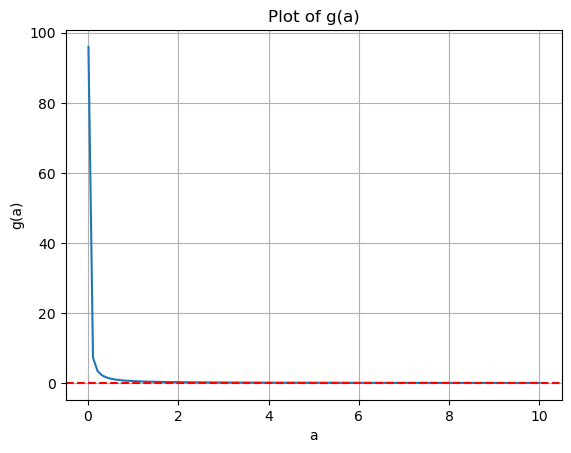

MLE estimates: a = 86.51220365856149, b = 0.29447240531086727


In [167]:
# plot the function g(a) to visualise the MLE estimates for a 
def g(a, mean, x):
    return np.log(a) - psi(a) - (np.log(mean) - (np.sum(np.log(x)) / len(x)))

# now we can plot the function g(a) to find the MLE estimates for a and b
a_values = np.linspace(0.01, 10, 100)
g_values = g(a_values, m1, dataset['BMI'])
plt.plot(a_values, g_values)
plt.axhline(0, color='red', linestyle='--')
plt.title('Plot of g(a)')
plt.xlabel('a')
plt.ylabel('g(a)')
plt.grid()
plt.show()

# The point where the curve intersects the x-axis is the MLE estimate for a. We can use the scipy library to find the root of the function g(a) using the fsolve function.
from scipy.optimize import fsolve
a_mle = fsolve(g, x0=1, args=(m1, dataset['BMI']))[0]
b_mle = m1 / a_mle
print(f'MLE estimates: a = {a_mle}, b = {b_mle}')


89.4444733183219 0.28481867861657806
86.51220365856149 0.29447240531086727


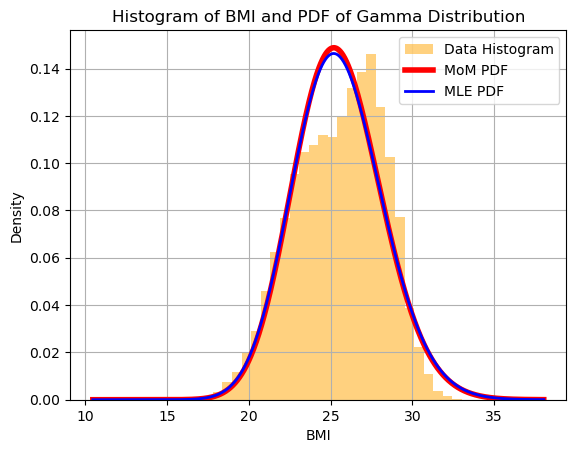

In [ ]:
# Comparing which method of estimation is better by visualising the data using a histogram and the pdf of the gamma distribution with the estimated parameters
# plot the histogram of the data

print(a_mom, b_mom)
print(a_mle, b_mle)

plt.hist(dataset['BMI'], bins=30, density=True, alpha=0.5, color='orange', label='Data Histogram')
# plot the pdf of the gamma distribution with the estimated parameters
x = np.linspace(min(dataset['BMI']) - 5, max(dataset['BMI']) + 5, 1000)
plt.plot(x, stats.gamma.pdf(x, a_mom, scale=b_mom), 'r-', lw=4, label='MoM PDF')
plt.plot(x, stats.gamma.pdf(x, a_mle, scale=b_mle), 'b-', lw=2, label='MLE PDF')
plt.title('Histogram of BMI and PDF of Gamma Distribution')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

**Note**

Here, $\chi^2(\alpha)$ is different from what we have studied.

- In our course:  
  $$P(X > \chi^2(\alpha)) = \alpha$$

- In the code:  
  $$P(X < \chi^2(\alpha)) = \alpha$$


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
#### Question 2

The 95% confidence interval will be:

$$
\left( \frac{(n-1)s^2}{\chi^2_{\alpha/2, n-1}}, \; \frac{(n-1)s^2}{\chi^2_{1-\alpha/2, n-1}} \right)
$$


In [ ]:
sample_variance = dataset['BMI'].var(ddof=1) # using ddof=1 for sample variance
    
# The 95% confidence interval for the variance parameter can be calculated using the Chi-squared distribution
# The Chi-squared distribution is defined by the degrees of freedom (df) and the confidence level (alpha).
# The degrees of freedom is equal to the sample_size - 1 (n-1).

n = len(dataset['BMI'])
df = n - 1
alpha = 0.05

# The confidence interval for the variance parameter is given by:
# [ (n-1) * sample_variance / chi2.ppf(1-alpha/2, df), (n-1) * sample_variance / chi2.ppf(alpha/2, df) ]
lower_bound = (n-1) * sample_variance / stats.chi2.ppf(1-alpha/2, df)
upper_bound = (n-1) * sample_variance / stats.chi2.ppf(alpha/2, df)

print(f'95% confidence interval for the variance parameter: [{lower_bound}, {upper_bound}]')


95% confidence interval for the variance parameter: [7.059589564780078, 7.462037968147726]
